In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import math
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import bisect

cosmo = FlatLambdaCDM(H0=72, Om0=0.3)

In [6]:
hdulist = fits.open('../petroC_nsa_gzoo.fits')
tbdata = hdulist[1].data
color = tbdata['col10'] #^{0.1}(g-r), K-E corrected to z=0.1, petro
M_r = tbdata['col9'] #^{0.1}(M_r) - 5\log h, K-E corrected to z=0.1, petro
pfeatures = tbdata['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
psmooth = tbdata['t01_smooth_or_features_a01_smooth_weighted_fraction']
sSFR = tbdata['B300']
HA = tbdata['HAFLUX']
HB = tbdata['HBFLUX']
O3 = tbdata['O3FLUX']
N2 = tbdata['N2FLUX']
D4000 = tbdata['D4000']
z = tbdata['Z']
hdulist.close()

In [7]:
D4000_bins, SSFR_bins, Errs = np.load('../Dn4000Params_final.npy')

In [39]:
early_pfeatures = []
early_psmooth = []
early_color = []
early_sfr = []
early_mr = []

late_pfeatures = []
late_psmooth = []
late_color = []
late_sfr = []
late_mr = []

int_pfeatures = []
int_psmooth = []
int_color = []
int_sfr = []
int_mr = []

LHA_arr = []
LHB_arr = []
LN2_arr = []
LO3_arr = []

for i in np.arange(pfeatures.size):
    if z[i] > 0.01 and z[i] < 0.06 and HA[i] > 0 and HB[i] > 0:
        color_line = 0.7 - 0.032*(M_r[i] + 16.5)
        active_line = -10 + 0.094*(M_r[i] + 15)
    
        #Convert fluxes to luminosities
        FHA = HA[i]*(1e-17)*u.erg / u.s / u.cm**2
        FHA = FHA.to(u.W/(u.pc**2))
        LHA = cosmo.luminosity_distance(z[i]).to(u.pc)**2 * 4 * math.pi * FHA
        LHA_arr.append(LHA.value)
        
        FHB = HB[i]*(1e-17)*u.erg / u.s / u.cm**2
        FHB = FHB.to(u.W/(u.pc**2))
        LHB = cosmo.luminosity_distance(z[i]).to(u.pc)**2 * 4 * math.pi * FHB
        LHB_arr.append(LHB.value)
        
        FO3 = O3[i]*(1e-17)*u.erg / u.s / u.cm**2
        FO3 = FO3.to(u.W/(u.pc**2))
        LO3 = cosmo.luminosity_distance(z[i]).to(u.pc)**2 * 4 * math.pi * FO3
        LO3_arr.append(LO3.value)
        
        FN2 = N2[i]*(1e-17)*u.erg / u.s / u.cm**2
        FN2 = FN2.to(u.W/(u.pc**2))
        LN2 = cosmo.luminosity_distance(z[i]).to(u.pc)**2 * 4 * math.pi * FN2
        LN2_arr.append(LN2.value)
        
        if LHA > 0 and LHB > 0 and LO3 > 0 and LN2 > 0:
            O3_BPT = math.log(LO3/LHB,10)
            N2_BPT = math.log(LN2/LHA,10)
            if O3_BPT > 0.61/(N2_BPT - 0.05) + 1.3 or N2_BPT > -0.2: #galaxies that lie above Kauffman BPT line
                sfr_ind = bisect.bisect_left(D4000_bins, D4000[i])-1
                logsSFR = SSFR_bins[sfr_ind]
            else:
                LHA_c = LHA*(((LHA/LHB)/2.8)**2.36) #corrected HA luminosity from Spindler et. al. 2017
                logsSFR = math.log(LHA_c.value, 10) - 41.1 #SFR calculated using Halpha flux from Spindler et al 2017
            if color[i] >= color_line: #red galaxies
                if logsSFR <= active_line: #passive galaxies - early type
                    early_pfeatures.append(pfeatures[i])
                    early_psmooth.append(psmooth[i])
                    early_color.append(color[i])
                    early_sfr.append(logsSFR)
                    early_mr.append(M_r[i])
                else: #red and active - intermediate type
                    int_pfeatures.append(pfeatures[i])
                    int_psmooth.append(pfeatures[i])
                    int_color.append(color[i])
                    int_sfr.append(logsSFR)
                    int_mr.append(M_r[i])
            elif logsSFR >= active_line: #blue and active - late type
                late_pfeatures.append(pfeatures[i])
                late_psmooth.append(psmooth[i])
                late_color.append(color[i])
                late_sfr.append(logsSFR)
                late_mr.append(M_r[i])

-8.2088352505
-7.37037833751
-8.50713483313
-7.70512788405
-8.77236336264
-9.36909303133
-8.65901365992
-7.84164895907
-8.77023853133
-9.04656919493
-8.13943873969
-6.72738607562
-8.31993872565
-9.16252519503
-7.65466298703
-7.12138892103
-7.82273881075
-7.7821368189
-8.10012584101
-6.61953312476
-8.22634815144
-8.15349520654
-8.57292762846
-7.8962852544
-6.78698282274
-7.91145029077
-7.98595664136
-7.85029314191
-8.67782506804
-8.11640526066
-7.45896825432
-8.48969890188
-8.08898081392
-8.39748891885
-7.75151083133
-6.97752803232
-6.87930434661
-7.72238685796
-8.69871499478
-6.50260087017
-8.68598621758
-7.58060098683
-7.8533263177
-8.20517408501
-9.34042528308
-7.16096825573
-7.15778188755
-7.68486228304
-7.77907353271
-6.44671163341
-7.40410366144
-7.88792722174
-7.23420640655
-6.48845334676
-9.77977816275
-8.30710245324
-7.31886122175
-7.69100484766
-7.56505405798
-7.39183294759
-8.46369909041
-8.22330444035
-6.93597245083
-9.09161163699
-7.68011675179
-7.10379772746
-6.76002692364

-7.6055916347
-7.46315443926
-7.18048178876
-8.03317632057
-6.82581298701
-8.44941204482
-7.07452743326
-6.78199611139
-7.28757493832
-8.27521609357
-7.16929360034
-7.34671552011
-7.80636758111
-7.86396881781
-8.25615753306
-8.49479861048
-10.5152889116
-7.63428273562
-7.38747766721
-9.0564305803
-8.58187997448
-7.95848543253
-7.36097127865
-8.50648950174
-8.03128803709
-8.08524616367
-7.18539429889
-8.20433520206
-8.57902736821
-6.65405086763
-8.72672584699
-8.52932328492
-7.84288804382
-8.00953942407
-8.01653335664
-7.82303242137
-8.44539668127
-8.05957032321
-7.29360715796
-7.41684863107
-8.60513207999
-9.9111566428
-7.45055812403
-6.64604957189
-7.79815756858
-8.11399121011
-7.99181681217
-7.46525835087
-7.18631947174
-7.35228470656
-6.44901235827
-7.29665566117
-7.7152965473
-7.06616612022
-7.0473699929
-7.11013314384
-8.84997431277
-8.63803651971
-9.72884760652
-8.39058670231
-7.61654919362
-7.35081926888
-7.63033241317
-7.63886484258
-8.09494390483
-6.59104491377
-8.69987449618


-7.91164659121
-7.83284784668
-7.87752505137
-8.19303406978
-7.65425174191
-7.99359159882
-9.67413172663
-7.30182149316
-7.74541743416
-8.38727282627
-8.27790795332
-7.54742684659
-7.64946716476
-7.28085297858
-6.86896944972
-9.65945617232
-8.12720124714
-7.75934733896
-7.36003825104
-7.86093499289
-8.25141153523
-9.17651060095
-7.69417480827
-7.96367150287
-7.55175809934
-9.15357514567
-7.08580282794
-7.1126303163
-7.79658209887
-7.83253656466
-7.58079017645
-8.22966625406
-8.19894605391
-8.18420790887
-7.08441473945
-8.35693328115
-8.27733633262
-6.17240211225
-7.76682683476
-7.3338451312
-7.71130259981
-7.30892400508
-7.51284456769
-8.27905407484
-7.63402524693
-8.81558489597
-7.5185334871
-7.07943813803
-6.94293494845
-7.93071158494
-8.05798730386
-8.31901775732
-7.34736031574
-7.58378438971
-7.9622277745
-8.56405788214
-8.50722397374
-8.0514788203
-6.88601962323
-8.30093889894
-6.82860922808
-8.38193903063
-6.7481454204
-8.06641708859
-7.92875868741
-7.39226963203
-7.32303778594
-

-7.7973589114
-7.83042627891
-8.54859102746
-7.43073078078
-7.77104599603
-7.74391137175
-7.1825116102
-8.27036379906
-8.07387869111
-7.33595240548
-8.04410428771
-7.74066449692
-8.38381245046
-7.80569632295
-8.22026116887
-7.06767476935
-7.49494043592
-7.16258049529
-7.86365973428
-8.44393691425
-7.35991091504
-7.24780175124
-8.08407568986
-7.81925700595
-7.07572222709
-6.87833958085
-7.61775546811
-8.41829103273
-7.11732459453
-7.09458110019
-7.29663235526
-7.32508170623
-6.77689177375
-7.60533885818
-6.88782193584
-8.66826304865
-7.15920167971
-8.31767460817
-7.41022846113
-8.60147074316
-7.19896610121
-9.62479488685
-9.08933353195
-7.94756019127
-7.73673485657
-8.56670177953
-8.01134118707
-7.38127133866
-7.62152180175
-6.83429919567
-6.69571961893
-7.77431178368
-7.50119658633
-7.7372992792
-7.9518289748
-8.39884007232
-8.163353778
-7.60575253025
-7.31503265308
-8.24890658935
-7.81179930589
-8.2051365069
-7.41595624567
-7.8097968124
-8.54593477362
-8.43927987487
-8.26538590053
-8.

-8.90315948131
-7.74921284626
-8.50891510098
-7.64554440921
-7.05604097341
-6.80655990417
-8.93122655356
-8.49243199521
-6.67315156824
-8.76688416885
-7.73614467382
-7.63836855398
-7.95510207201
-7.59734125079
-7.71509641147
-7.17661940123
-9.08175670873
-7.88170252695
-7.89278347373
-7.74072026615
-8.77770339398
-7.36878683152
-7.91561287758
-6.66889619441
-8.11772507481
-8.22597154264
-7.15962190079
-8.41370360166
-7.09132283183
-7.89838387622
-7.60743046995
-10.74688712
-7.97972628235
-8.21050183558
-7.99473774173
-7.10251133999
-7.35838400694
-8.07999147986
-8.03005700864
-7.61872358376
-6.95091581005
-7.94388944135
-7.19518763127
-8.09756030496
-7.55162237241
-8.55053818348
-7.34450621206
-8.00702948019
-6.59589935073
-6.95465856057
-7.70450097387
-6.47861110465
-7.33048216744
-8.74406059795
-7.23118183246
-8.82281330144
-8.46495885536
-8.57297832015
-7.70601589825
-7.13916506609
-8.27515939547
-7.325104232
-7.36632881533
-6.87125929852
-8.88448076456
-8.02380880235
-7.05469827191

-8.46033787099
-9.11652475718
-7.92591141412
-8.28491975674
-7.26169742624
-7.86936148625
-7.50114616445
-8.42242643899
-9.06115741599
-8.42676711765
-8.70940005188
-7.50260848003
-9.05781963524
-7.65904097591
-8.16013091985
-7.45145552145
-7.38546587392
-8.23223669156
-7.2320411987
-7.71048730332
-9.11419535049
-7.02329860061
-7.89782431132
-6.77478277471
-7.21940624981
-9.04770673098
-7.87564196166
-8.0897786578
-8.24120289196
-8.0066408706
-8.24083670794
-7.74189463491
-8.02267501349
-7.97043615338
-7.0591371404
-8.47941748611
-6.94526587822
-7.36276857131
-7.33711592359
-8.44702530578
-7.59151875953
-9.00807633487
-7.31631254662
-7.61815259392
-7.14302175166
-11.2018320628
-8.64041664223
-10.6796078772
-8.14581736451
-16.4515932537
-8.61297546132
-8.17920292696
-10.2899673888
-9.47515941734
-8.40929267906
-7.97103134042
-8.51778107858
-7.28487978142
-7.25384831159
-7.33018440112
-7.2796047488
-8.58442046512
-7.30787658666
-8.42694366989
-7.78224646503
-8.21055745947
-7.66529527369


-7.15162589373
-8.21268359691
-7.38948627651
-7.90649910235
-7.3362774344
-8.11781952967
-7.87854499247
-7.94373902376
-6.95212477828
-7.27696667404
-7.20929542807
-8.54849678977
-7.65979441774
-8.44846923778
-8.26244645717
-7.50755257233
-8.20076090275
-7.70461204906
-8.13166767779
-8.97545564215
-8.77706610707
-7.64651550794
-7.02352456756
-7.72546185114
-6.37434744739
-7.5650845539
-7.87099720454
-8.18599287178
-8.86292373133
-7.0862472958
-8.23530196909
-7.39765961009
-8.19249417365
-7.34706936122
-7.56016158037
-7.76662965
-8.0774985918
-7.22271020557
-7.7827409304
-6.88556524318
-8.08540033794
-10.6313043953
-7.16680290659
-8.0053843844
-7.89639533281
-7.21853191423
-8.25072339858
-8.95349462466
-8.82954307728
-9.0073601173
-8.7465231611
-8.05714767957
-7.56856146232
-7.33342197379
-7.99905336713
-7.92848496405
-7.78479184072
-7.14100412683
-6.70824797157
-8.01103493817
-7.97893957874
-8.13453671076
-7.29102881823
-7.68791141351
-7.74286027173
-7.68193727275
-8.14335059462
-7.873

-7.22172384045
-8.61339471412
-6.94733271039
-8.02664661333
-6.89328011861
-7.16970585019
-6.67690798345
-7.644287165
-7.22723472688
-6.88664155532
-7.71665336215
-7.63678080048
-7.17346806223
-7.19055264534
-7.58724711269
-7.50197071885
-7.49715010124
-6.92808709403
-7.43510739933
-7.89693579074
-8.10190365471
-6.81866713945
-7.13884159813
-7.4924286382
-6.99711917032
-6.1330807094
-7.95600170827
-8.01593259399
-8.12282500398
-7.73088600634
-8.15520872734
-7.63419736312
-8.0083434743
-8.03584799323
-7.14624944237
-8.28573242173
-7.42368926836
-7.99561248816
-8.06405798392
-7.65876172037
-9.40629802922
-6.85235724021
-7.7730682904
-8.08146741702
-6.13620129823
-7.40936404855
-8.20735345738
-9.97484087136
-8.78174705658
-6.58299468279
-6.87046774204
-7.7442874222
-7.69461093362
-7.71685397164
-9.1073553056
-7.51626223201
-7.73236595174
-7.91737260362
-7.90911619805
-7.6475528439
-7.72126389934
-8.31240222347
-6.72157175345
-7.95028696559
-7.41994594987
-9.11155865523
-8.23408731422
-7.7

-6.73436001619
-7.84043394315
-8.43596724225
-7.64632898121
-7.64507586198
-7.47266677131
-7.43144053678
-7.40249214867
-8.47865266745
-7.54349423893
-6.95678780513
-8.7377920797
-10.0640433814
-9.29202020955
-9.31136361196
-8.70845276267
-6.88998221492
-10.3938009824
-7.42343280766
-7.18021697111
-8.03826307513
-8.08338808074
-7.38027151721
-8.42009517808
-6.90409917953
-8.12011295613
-7.50075098364
-7.55042418983
-7.01671470445
-8.11998900955
-6.88541929711
-8.11375021212
-7.47672710033
-7.47403069401
-7.776215858
-7.25768644536
-7.25912014222
-7.67702256
-7.29773599829
-6.56829676551
-7.5688877951
-8.43815414118
-7.28405741998
-7.18146022569
-7.07577302055
-7.90297043515
-7.406375814
-7.1216981991
-7.65228038556
-7.03780196004
-8.1242181711
-8.8035543166
-8.16143084021
-7.26804881897
-7.79439199086
-7.57626483936
-6.76214784678
-8.00919167894
-8.10777978817
-7.70061403144
-7.77929983204
-8.91047393284
-9.33454023438
-6.55479046132
-7.11909141708
-7.66514834183
-8.79116559616
-7.1629

-7.09725059116
-7.14217532998
-7.41217824874
-7.68088957772
-7.6480077703
-7.79291731474
-6.70472958809
-8.15669545796
-7.55757735701
-7.3723377411
-8.82551663591
-7.58381398292
-7.64650932156
-7.19740402132
-7.6916975527
-7.60312215328
-8.29259423869
-11.7100048263
-8.26109554029
-8.5251012801
-7.78376050148
-7.49355829438
-8.01498059021
-7.6218677964
-10.1390056953
-7.59978863064
-8.00062795591
-7.41575309835
-6.6809348734
-7.65600765052
-6.63909503808
-7.97558874128
-6.50578287454
-8.36031727274
-7.4944730924
-7.4316378144
-6.82828147363
-7.23371854846
-7.34740258523
-7.3510889422
-7.17116431579
-8.88219932271
-7.19455616131
-8.13849621669
-7.3011046785
-7.69282383644
-7.09560694941
-7.92616998171
-8.13530226287
-8.75766551484
-7.62552177357
-7.57621201677
-8.53072352075
-7.12382988364
-8.86667267908
-9.14884648995
-7.32406146534
-7.57898939109
-6.56297619203
-8.46799429872
-8.0519625726
-7.71694577199
-7.24505991306
-9.00702996924
-7.72417274928
-8.20169386627
-6.90983544795
-7.760

-8.6549847861
-7.7045473556
-6.53884678091
-7.81382003263
-7.00460018671
-8.31421450725
-6.78861976365
-7.33900397637
-7.69357218726
-6.86778131827
-7.09254155266
-8.21042916975
-9.08936729308
-8.20640913991
-8.51178244758
-7.7962596119
-7.62916494534
-7.5074075813
-6.50728058714
-7.33957422209
-7.27147547455
-7.70691683018
-7.36808859236
-8.06947504536
-7.46988850969
-7.97100574612
-8.13213767225
-8.43795499674
-7.83966194875
-14.1815091557
-7.54211075404
-8.79515067125
-7.08357313021
-7.42132127567
-10.171742844
-8.23529592589
-7.8734498843
-7.93819124877
-7.63530514374
-6.80472949051
-7.6314284622
-8.51047813763
-8.76532219535
-8.08889302248
-8.29342141577
-6.93354340102
-7.8597245929
-6.81934151701
-7.9298946962
-7.62996531704
-8.20672111686
-7.20096815372
-6.86420609778
-8.58770868966
-8.42380991658
-8.49880096686
-8.72071381609
-7.26308367055
-7.37345093432
-7.18428076168
-8.26966822373
-7.74033568189
-7.29658451476
-8.13302969441
-8.0402440929
-7.9866762786
-7.44357553578
-7.755

-8.67537398642
-6.63186471996
-8.59077693008
-9.4759375764
-7.92035348672
-7.81171397405
-7.21483709432
-7.07691711462
-8.17626698984
-7.34634462001
-7.81619799962
-11.1380871567
-7.67247836627
-7.66435259768
-6.57202409172
-7.56912172524
-7.73000592276
-7.85282477678
-7.52336823967
-6.97420232531
-7.72143916619
-8.02022118848
-7.2653962614
-8.50583725934
-6.59124333468
-7.40250654373
-8.74641921958
-8.00239429337
-10.0517040243
-9.14299938604
-6.80024294311
-6.90420556346
-8.39257491552
-11.1931046174
-6.60232781689
-8.23810006637
-8.49891453169
-7.68072764646
-7.69473256103
-6.66001842838
-7.67274778877
-7.5289020375
-7.66292412781
-7.33624585005
-6.38026549423
-7.42361047729
-7.80609204256
-7.0091238012
-8.1624547763
-7.66855153721
-8.21479520419
-7.59741668173
-7.1478283549
-8.26391402237
-7.66681106873
-7.37462527457
-8.54717067312
-7.64772284951
-9.21007321075
-7.33953602701
-11.0543553836
-8.00812647966
-7.10243452007
-7.8134627554
-8.04252086083
-7.47563704366
-8.16053981244
-7

-7.92831855323
-7.83349155053
-7.65931474052
-8.0211606261
-8.84589922111
-8.1440864995
-6.67393927565
-8.70266514197
-7.94426269844
-7.85785098046
-7.42191390601
-8.6406069784
-7.90816322198
-7.75263521916
-7.64784812356
-8.97501746006
-8.17052812576
-9.21924751852
-8.22048013967
-8.26200600874
-7.22869933177
-10.2173209717
-8.40995217152
-8.30236450806
-8.26761708039
-7.92179209757
-7.64025403545
-8.47511413316
-7.11540264748
-7.53643296668
-7.97832153398
-6.51506239046
-7.13396459246
-7.83722367911
-7.29318115712
-6.86425195391
-6.79750109409
-8.36197680374
-7.89870566206
-8.63112115718
-8.08477932563
-8.27553875502
-7.05066346905
-7.95400108703
-8.06062552097
-8.55982482371
-8.69343786832
-8.18293774425
-8.55093505364
-7.88393071332
-7.4468849095
-8.59980371555
-8.12984184893
-7.76708764402
-7.45642455038
-7.41641097038
-7.37305832707
-7.44375756547
-9.23086543903
-6.70067184409
-8.09602710618
-7.26810691099
-7.26073287676
-8.13486909186
-8.04440482054
-7.97806458794
-7.10957859899

-7.98063807433
-9.11717950465
-7.77944482025
-7.02657286816
-7.5880357444
-8.82626998702
-7.62679974149
-8.58115014447
-9.11785987378
-7.47480497803
-8.85509158777
-7.06392204469
-9.00020975499
-8.04584462039
-6.76487937916
-7.81551148395
-6.84254979598
-8.28186638563
-7.64964710331
-8.43544944317
-6.82798266092
-7.60619162457
-7.31169150692
-8.34389757305
-8.22496654789
-8.75061958356
-8.24798750065
-8.44835108177
-8.05966578242
-7.76636599555
-7.6401734624
-8.41173103173
-7.94883412194
-7.76369264838
-7.13081430187
-7.21621738266
-9.12912598955
-6.91575136781
-7.29070328495
-7.84785967936
-7.27621300857
-7.24103719092
-8.53614350014
-8.60063782895
-7.80774286167
-6.68139667073
-7.90078837301
-9.080740328
-8.55569366449
-7.54908434146
-7.4268882819
-7.41545693748
-7.95916142149
-7.21659239325
-9.16231351054
-7.7938371893
-8.60906652246
-7.25988818596
-10.813743437
-7.82043605081
-8.13482135193
-8.39457027419
-6.72361910667
-6.8091957881
-8.68424506313
-8.94160631731
-7.39598375117
-7.

-9.04140144672
-6.67575468737
-7.28272751441
-7.48088084677
-7.93415919494
-7.75759793796
-8.24902991746
-7.43807819942
-6.70896199381
-7.43728302924
-10.5366325373
-6.77745715552
-7.04899724566
-6.71920041409
-8.08805561592
-7.6477366202
-8.34748735234
-8.31484801406
-7.05822988395
-9.42609482478
-7.58570495758
-7.55440157202
-8.08088839378
-7.88929244621
-7.71350516735
-7.25755035616
-8.40839555777
-7.09602785988
-6.59477535277
-7.94153673845
-7.60845370629
-8.60404568857
-7.29988212377
-7.8916851072
-7.55174228164
-7.47071352644
-8.82362093422
-8.19316811216
-8.15533218246
-7.7737314656
-7.96117096
-7.32344263312
-8.42166988292
-7.37405132807
-7.43298992012
-10.8106078083
-7.28078729315
-7.74675544456
-6.62613783488
-7.37457357211
-6.89100982712
-7.5527866156
-7.45690219657
-7.81812362098
-8.10338735771
-8.96511191557
-9.01108566577
-8.1245543134
-8.52769585991
-8.14832028172
-7.44429063476
-8.01080665979
-8.103910613
-7.24401361862
-7.42613354155
-7.90532455171
-8.51463979428
-8.05

-9.10368602936
-7.53591283655
-8.69441569955
-7.69240666693
-8.01344912139
-8.88390963834
-7.25148118288
-7.55643823198
-7.36789998762
-7.79742938834
-7.8932590139
-7.78156791778
-7.62137915678
-10.3569709877
-9.01261375172
-7.54986806274
-7.69505277529
-9.10394336482
-8.47456227919
-7.29733612446
-8.68341702306
-7.32367024877
-7.89079816256
-7.8172348455
-8.54944758401
-8.25605050212
-7.78832776526
-7.71839229118
-7.90504169613
-8.96189773671
-7.27934841264
-7.24374412035
-7.92751300512
-8.41596049649
-7.04529258016
-7.86954177857
-9.25300345905
-8.03841433003
-7.82043078654
-8.44210765157
-8.47677529331
-9.44606234018
-7.28623882518
-8.22870547266
-6.94513322668
-7.3217975357
-7.80715903672
-8.21259321142
-7.34875555551
-8.31308632419
-7.62794019919
-8.02856515177
-8.01441759557
-9.48904136179
-7.89452222833
-6.55260974612
-8.0394917112
-7.5167269682
-7.20394712221
-7.59116953477
-7.02501111245
-8.83021610205
-7.80867531397
-7.90504412943
-7.36752134697
-7.75337780247
-7.91778467319


-8.45823842331
-7.41707490772
-7.89478656548
-7.32818993699
-8.50242360405
-7.4196831774
-7.727316078
-7.19887105418
-7.19778832506
-8.04949336607
-8.37546795552
-8.62398653258
-6.79614268561
-6.957565427
-6.89451121775
-7.24455280575
-8.91504624471
-7.43504568045
-8.23023418019
-6.61471094142
-7.33039856491
-9.04878328417
-7.0847210287
-7.35384843961
-6.73660805184
-9.26194459413
-7.90710600359
-7.36228860237
-8.32902626825
-7.4299661998
-7.42463210149
-6.87488916647
-8.18904846231
-6.08956074717
-7.70327837638
-8.18974056959
-8.52185221818
-7.08928779706
-7.66588744295
-7.86270314855
-7.49333622033
-6.82698225081
-7.79216984615
-8.04550079376
-7.80674350668
-7.22598317579
-8.51873712305
-8.04613280306
-7.30100191862
-7.16444329165
-7.75819398128
-8.64162642773
-7.42891879998
-7.60181093888
-7.61161356385
-7.75327495937
-7.77585587687
-7.82421157906
-7.23085117409
-6.77919256943
-7.34900793716
-8.70671194223
-8.01754840422
-9.10811488527
-7.14145600256
-7.93794048229
-8.10350303333
-8

-8.81818367336
-7.33246280997
-8.2088341359
-7.39765193526
-8.83729908277
-7.71066252852
-7.28242075289
-6.80199120565
-10.9657547437
-7.66758842503
-7.16840049288
-8.71428083304
-7.03281863036
-7.73763914512
-7.73025801597
-8.69848951063
-8.13852952772
-7.86568543208
-8.47401602097
-7.21161992219
-7.67136255173
-7.8717037242
-8.1248415196
-8.03569827237
-8.6537648035
-7.74852282058
-7.65789252729
-7.03836058149
-9.20866298981
-7.04264618205
-7.68451474715
-8.57019979727
-9.34532943313
-8.10837419615
-7.18087622828
-6.93093134011
-7.50143794459
-8.24408628753
-7.49405185682
-8.49149525772
-8.32150004832
-11.6652048194
-8.32261205832
-8.28959124185
-8.35333922691
-8.16815618231
-8.37864782162
-6.68099885809
-7.16507040393
-6.78108620907
-7.67607447203
-7.55471075694
-7.57652065159
-8.30918069349
-8.35249038142
-5.85700702739
-7.05453810019
-9.42797728257
-7.34820671654
-10.4298927643
-7.4482700827
-8.42743545508
-7.51416951181
-7.6440038527
-7.16749015707
-9.18003271799
-7.01117642641
-

-8.10015927596
-7.39535220807
-7.68711720413
-7.60058551817
-7.80493977937
-7.88316443662
-7.34571566814
-7.90911078361
-7.32940802148
-7.62997953534
-7.17065437625
-7.61951144109
-7.28826481992
-7.1510733147
-7.83047217556
-8.21100423682
-7.71938864656
-7.88601140395
-7.0155757027
-7.45350068582
-7.14898538012
-7.64779762416
-9.97796202644
-8.51749381298
-6.86892709923
-7.68625443883
-7.52625299463
-8.32009576892
-6.83693332077
-7.58514023419
-8.07030401187
-8.12124492866
-7.45367070266
-8.08182031031
-7.37897513763
-8.28553581032
-8.14057827057
-7.3476084524
-7.33623585102
-8.75180782573
-8.63431131866
-7.27149679237
-7.9752296863
-7.39985978189
-7.50125214199
-8.52531675889
-6.86840503452
-8.11089027532
-8.44279245561
-7.47387632322
-7.9157611157
-9.39535437274
-8.96023000333
-6.62359939105
-7.60840752301
-8.3728948508
-7.48081160162
-7.49188611022
-7.30653732363
-7.98610675072
-6.90832104448
-9.64158833859
-7.87161199681
-7.98874665263
-8.23469749275
-7.46781786428
-7.30568744311
-

-7.26316794191
-8.15121791917
-8.12513567638
-8.51262363387
-7.57633821094
-10.4344697454
-8.09354233886
-7.5011864838
-7.33082097327
-7.53008899584
-8.3362708511
-7.45183719233
-7.02006331782
-7.86072577296
-8.82145210892
-7.69080600332
-8.15571363185
-7.13536952142
-7.45621049467
-7.48833729367
-7.77330224777
-7.01803661499
-6.89137559821
-7.94202180917
-7.22380952499
-6.64560171515
-8.44546393944
-7.21440341892
-9.9075029396
-7.34601904012
-7.39626833586
-6.9385989434
-7.77580645196
-7.78328864605
-7.52662950929
-7.3493465753
-6.96495885254
-7.68133424265
-7.32999927108
-7.17297066126
-7.77899942542
-7.49789932807
-6.71694794528
-7.62755683162
-9.62746116294
-7.66573957228
-9.28126565559
-6.88832226471
-7.89481230715
-7.43246977976
-6.97102949524
-7.73353158627
-7.37556388403
-7.90597148469
-7.34025966508
-7.79861855558
-6.81727782435
-7.74469356836
-9.37364521331
-8.38475511273
-7.7334609441
-8.44394799367
-6.87858660379
-8.50302101987
-8.3922042159
-7.57608204733
-9.01144120829
-7

-8.09254443306
-7.97375161585
-7.71091883186
-7.64891340043
-8.07466524397
-6.80715598735
-7.85055072779
-7.03532758629
-7.69627972102
-7.86602962534
-7.84400297918
-6.75501527643
-7.73805099497
-7.15495471244
-7.32479321831
-8.40561046929
-7.24149580565
-7.0710191522
-8.59039464246
-8.4498156419
-8.59969853653
-8.22417226449
-7.46690228296
-7.85338800787
-7.34424907727
-7.5595542836
-8.97028978793
-8.12632307781
-7.48425136496
-7.16048788203
-7.25105383711
-7.64724785822
-6.8182016714
-7.54512027147
-8.37219572711
-8.99651604974
-8.01375166147
-10.2329137299
-7.55722469868
-7.53498095388
-7.42253783633
-7.27808153056
-7.80669125489
-7.45849483544
-7.71974576689
-8.67316737649
-7.81406031059
-6.8057942501
-7.40116486622
-6.39708283734
-7.50917785686
-7.78862749607
-7.88952037703
-8.02286723047
-7.72132798665
-6.44111067146
-7.15574001734
-6.65735297191
-7.08480689041
-6.7074573253
-8.89587856512
-7.86881671962
-7.23331619576
-8.05880896656
-8.6173788472
-7.77001754953
-6.97316059803
-7

-9.26521819488
-11.0347676329
-7.95173659829
-8.07590997204
-7.24426238472
-7.83229167588
-7.49080348155
-7.6079106376
-7.60391325029
-7.98198271609
-9.41780198374
-9.28049251664
-7.29199310394
-8.92227778818
-8.33318265071
-7.85215443528
-8.55042345937
-6.93137717365
-8.94863998368
-8.40151536811
-8.92039118963
-6.85260320799
-7.78115429661
-9.87233800147
-8.28475091612
-8.07613140753
-10.2898435775
-7.03362895211
-8.91117368361
-7.40111920141
-7.71988870185
-7.74469649028
-8.22199000399
-7.46473223619
-8.54319312769
-8.52932163475
-9.03532296522
-7.49338573489
-7.85975639215
-8.24907354545
-8.56088984383
-7.96208455109
-6.9228295467
-7.23001593557
-8.85871265452
-8.56643973393
-7.97187546554
-7.66406718315
-8.30900904182
-8.44975023083
-8.40010944771
-7.42004141688
-9.76682541698
-7.09331491513
-8.36759521076
-9.93367143654
-8.44451722812
-8.01642691186
-7.35537676484
-7.08994686223
-7.67990742966
-7.29354642222
-7.54921956248
-7.3230437012
-7.62810455622
-6.9575684256
-7.33382060985

-8.19466662406
-8.11747136721
-7.87563994089
-7.45096278678
-8.82304836756
-7.34354268394
-7.73449580868
-7.49968650112
-6.81501278178
-6.70049273856
-7.55763537968
-7.27792170748
-7.41480971322
-7.50641787047
-7.21715109568
-7.11578070282
-7.56219245079
-8.00229679367
-8.96473120616
-7.69688629942
-7.42440237051
-9.08205892534
-8.18698542195
-8.32037701192
-7.53849432622
-7.6210587006
-7.66640427698
-7.59342671923
-8.76107328161
-7.68242157819
-7.41336752368
-7.44345183474
-8.7181948307
-7.00840497195
-8.13883627571
-6.83502323494
-7.57158799957
-8.53925513666
-7.49741181607
-8.34666254946
-8.88613054192
-7.40944966925
-7.51671307194
-7.99783614933
-7.81203656278
-8.1110911731
-8.08693997479
-8.72485304083
-9.07659552994
-7.4670750544
-7.59299328273
-8.0764162317
-7.68674712752
-7.22477289493
-6.26298775671
-7.20218367864
-7.27423165888
-10.0009916079
-6.57802769847
-7.1559494873
-7.61996892787
-7.25275176457
-7.90690640296
-8.85428743731
-8.12093280104
-8.13191124275
-7.27960807025
-

-7.34493237896
-8.12164324364
-7.46260160257
-7.64868295885
-8.02235378201
-6.84020007614
-7.26249621552
-7.68344015031
-8.07513351088
-6.56856374619
-6.83923186651
-6.52280398025
-8.1863443183
-7.57153584523
-7.96905297374
-8.06702990379
-6.99840072287
-7.80764165886
-7.59437434548
-7.699887874
-7.33778191601
-7.25632460643
-7.59451780225
-8.83816600856
-7.8519222267
-7.60332965119
-7.81045176442
-9.35436178899
-8.25303569533
-7.49585145192
-7.60730819702
-7.30476550913
-8.11744114334
-7.53021767508
-7.47762844414
-9.16983191777
-7.11881800989
-8.33193831004
-7.21677075456
-8.6321934991
-7.50411178869
-7.20403078896
-7.41415510249
-7.21049411631
-8.48700910447
-8.5573372677
-7.58318336259
-7.89256834698
-7.72507266872
-6.73388504038
-6.80586944077
-7.69687248804
-7.00285747694
-8.10172605862
-7.5890582687
-7.13862976515
-7.63944149695
-9.43311479332
-7.50787760752
-9.62595554815
-9.04008058985
-7.90342621703
-7.45269506323
-7.126200696
-7.97243108034
-7.63202678949
-8.18928223079
-8.7

-7.46637107301
-7.0644960305
-7.67620475019
-7.41190728266
-7.73968071506
-7.49225664021
-7.56761195122
-7.07386800417
-6.27246739108
-7.0798213399
-12.0733029247
-8.44851989229
-7.15591354736
-14.9275163804
-7.27759475966
-8.45136749367
-7.81342107454
-7.63129003063
-7.71369233926
-7.02105535057
-8.19601105051
-8.26720029706
-7.73519405636
-8.30679780352
-7.73039723925
-7.19482523889
-7.90299870994
-9.0228896673
-8.27932343646
-7.82789197206
-8.51118116648
-8.01976807162
-6.95127853736
-8.06532681226
-7.93446319998
-7.96756240365
-7.33594703869
-8.23942688033
-7.57319244356
-8.77366417137
-7.81635586051
-8.82608415229
-7.09189107076
-7.31111118761
-7.33459540393
-8.40701855023
-6.15109569016
-7.68118203189
-7.17589867339
-7.24160576157
-7.06312411393
-8.03573548015
-10.3472003007
-7.71924877124
-7.76337775166
-7.27542664688
-8.71899883897
-7.24398265889
-7.5798530464
-7.33434665993
-7.56438634403
-7.73018610043
-7.91592843603
-7.83064035636
-8.03921945838
-8.07042952187
-8.02141731141

-7.61697110712
-7.89797047967
-7.95648473184
-6.7372119135
-8.349873962
-7.31057166192
-7.72615306261
-8.04398396688
-7.90805679491
-8.83975955534
-8.71843688037
-7.46990845794
-8.27353152971
-8.68151757784
-7.07705470312
-6.77945821604
-7.9541970582
-7.87973077367
-9.89579931409
-8.15863996488
-7.52461395898
-8.52023458717
-7.53537394345
-7.36135308777
-6.54892006182
-8.18242293177
-7.52010190428
-10.8722797251
-8.75730994136
-7.56150177365
-8.41339711104
-7.74977074643
-7.6478216263
-7.58815694094
-9.04983985764
-7.35171503004
-6.42437531801
-8.00066449743
-7.95074870559
-8.62133773903
-7.02356544889
-6.90369649827
-7.83726957056
-7.94159595875
-7.95368367601
-8.10601782697
-6.37882337333
-7.20395973174
-7.69478214648
-8.26425266277
-6.98533732861
-7.99137798521
-7.42276692562
-8.60161876535
-6.57130922698
-8.20644432714
-8.40462078665
-10.710718155
-8.8749660745
-7.80382331273
-8.42326177787
-6.43914818016
-7.52726053403
-7.26052579241
-7.58915452414
-7.63822086305
-6.74431615368
-8

-7.82683795313
-8.43406682867
-8.33230679357
-7.90787901389
-8.24598802613
-7.05622740878
-8.25862796235
-7.34970643796
-7.461058155
-8.44298396622
-7.00002875805
-8.00756165975
-8.18699612577
-8.10201616708
-7.53825320121
-7.02450371059
-7.94513923161
-8.06564933456
-7.58342920473
-7.76094251211
-8.43700926659
-7.95622750421
-8.67330139373
-7.58496772476
-9.09337369433
-7.41560600015
-8.04665017186
-7.86025847005
-8.28006174249
-10.6167418573
-9.01672498378
-8.27899336254
-7.40577393382
-7.9001877196
-8.25400391934
-6.96434184172
-9.53434741595
-7.84771950838
-7.22189090923
-7.82183685362
-7.62814453489
-7.12320744253
-7.1319144412
-8.07418037781
-7.70397654024
-7.97355972445
-7.78216605903
-7.60714503932
-7.18330291958
-9.59341611239
-7.52605774699
-7.11626229922
-7.42673607589
-7.09489115453
-10.066759361
-7.57994289036
-7.73575010909
-8.81114037388
-8.76993308483
-8.69609393985
-7.72048814721
-6.90888948884
-7.19349527343
-8.08484007963
-7.31727940465
-7.96282450423
-7.95963974102


-7.43808038642
-7.06582833299
-7.24030144137
-8.12150677261
-7.42423610737
-8.21640082299
-10.1182977911
-8.54625323768
-7.91399623475
-7.97933497126
-8.60525334863
-8.85485680297
-7.73478215391
-7.43320405882
-7.49820166908
-7.12125554064
-7.40189203505
-7.15296828052
-7.8753037942
-7.50388461955
-7.27395629116
-9.24765394727
-8.08694351267
-8.43038390638
-8.24002674754
-7.78261989997
-7.70572652859
-7.97876876715
-7.68334497154
-7.42827027616
-7.64820262084
-7.95614618854
-7.09492336124
-8.19354470231
-11.4566652378
-8.36048074969
-7.22729199002
-7.84195771551
-7.10901900905
-7.51451736275
-6.83601005645
-7.46543140514
-7.2500362231
-7.02115931534
-7.34346868016
-7.36009772474
-9.21869448736
-7.03469355957
-7.17514232668
-8.16201760178
-9.54004091857
-7.18879622804
-7.47758261004
-6.99562963101
-8.14899307174
-8.89140451171
-7.18794186129
-8.66227685719
-8.1190779659
-9.24703554039
-7.49647576922
-7.55088543493
-8.12222803711
-8.17820823587
-7.68181303924
-8.09544722298
-7.7336610139

-8.66153229393
-7.3442357588
-8.31104609789
-8.14836337818
-7.55143870857
-7.70246560595
-9.54792060021
-7.94109506985
-7.9350533711
-7.56910473466
-7.25217124652
-7.6398069355
-8.93991357156
-10.1992228984
-7.04935318221
-7.81230708891
-7.77955765967
-7.76469362253
-8.57246781557
-8.76944550341
-7.8643471207
-7.65310793548
-8.85622681369
-7.7560711517
-7.44258463504
-8.97707838758
-8.18059574216
-8.16264553121
-6.56892823016
-7.03159203243
-8.42879664526
-7.38755660704
-7.9282042929
-7.26082043374
-7.64137437969
-6.97652367313
-8.17284131441
-8.43220460845
-7.70967193244
-8.03433751966
-8.43981338494
-7.76815989515
-7.38753014905
-6.28272902584
-8.10644848538
-6.51792242983
-8.33402312189
-7.59451898426
-8.2001461497
-7.42570403066
-7.27258497689
-7.63303507244
-7.82005093993
-7.35198718092
-9.66920834465
-10.8417503602
-7.53250498199
-7.71588281699
-7.28058324571
-8.2391495168
-7.77664219786
-7.29338504141
-8.76218299353
-9.27230850554
-8.86826883893
-8.9212508115
-7.11222276798
-7.2

-8.05969125294
-8.32575108906
-7.99005570445
-7.76424111899
-7.68077341585
-6.21330587756
-7.80250658868
-7.56705546392
-6.55606832724
-7.21518681149
-7.26977376348
-7.32665992836
-7.25222640186
-7.27014290743
-7.86935738233
-7.84495457666
-7.26201404084
-7.76415938607
-7.98968812096
-7.65673756406
-8.4446158758
-7.56914125165
-8.49543628086
-8.4095017197
-6.43632352367
-7.94067065809
-7.77223784248
-7.41456585263
-7.73136390662
-7.06633362204
-7.58944331311
-8.025934477
-8.47174333127
-7.87061170274
-7.82715757195
-7.60014111057
-8.16321529177
-7.90494220083
-7.0281245928
-7.28963141372
-8.18091857374
-10.8015542767
-7.36884441209
-7.85075473177
-7.56509732695
-7.91570425354
-7.5161457653
-7.45976955976
-7.37680461566
-7.72161868721
-7.4704354118
-7.98945228445
-7.78066065664
-7.05009547443
-7.65066142442
-9.74179073826
-7.20517860187
-7.43417543562
-6.84899249157
-10.1937119564
-7.67815332981
-7.54290469643
-8.02045781698
-6.65131452591
-7.56952037057
-8.53626960535
-10.4951985404
-7

-8.16449903528
-8.15897152863
-7.17297016882
-7.16157070242
-7.62793704774
-8.06327077926
-7.99427392119
-7.54810904458
-7.88901240526
-6.70671738217
-6.80612556167
-7.20759306306
-8.43180501242
-6.54291403428
-7.31525783672
-8.15746929118
-9.29239166848
-7.76724518302
-7.27624703359
-8.93437716944
-7.88308847283
-10.6451175556
-7.58549414874
-9.03647541922
-7.38480335653
-7.68341230408
-8.24364147183
-7.8441245728
-7.09410427336
-8.84406477329
-9.33615398766
-8.65770093454
-7.11249579359
-8.06080571102
-7.43184364644
-8.47640433717
-6.79897246286
-6.94923178312
-8.21162714782
-9.50636200941
-8.99781473675
-7.52977021824
-8.42575842388
-6.85207540266
-8.54115360062
-7.22566128625
-7.98192021319
-8.19184658811
-7.90118705458
-7.62105133384
-7.29788322111
-7.29015865846
-7.70317957139
-7.34983461846
-8.22001805341
-7.64128584597
-7.25477242832
-9.30330052682
-7.63622838966
-7.1552225532
-7.20271355311
-7.8225377233
-7.20454442215
-7.27543723673
-7.80354744868
-7.45317277936
-6.7310664054

-8.57561954551
-7.55820982062
-7.67138005294
-8.15299906803
-6.84555671672
-8.33673626389
-7.30686032618
-8.12208950583
-8.00210910118
-7.82003659033
-7.64226725286
-9.85426192812
-7.55417247356
-8.22550535803
-7.54231117246
-7.75939703955
-8.45401190877
-6.74529794365
-7.54476175473
-7.47076131593
-7.17797569835
-8.20414803839
-8.57807264388
-7.07326292174
-7.01369671866
-7.45257467462
-7.63190297053
-8.14274793228
-7.50257844884
-7.02945006185
-7.79807888799
-8.01804160679
-8.04313324583
-8.91518649202
-7.94883753516
-8.97841286855
-7.6301575804
-8.70282094666
-8.6011478895
-8.84784162026
-8.73149982623
-8.36940318418
-6.85351041169
-7.72031481422
-7.83896831074
-7.6407843959
-7.92457814627
-7.39746349727
-7.4656488778
-8.36663080973
-7.0793126475
-7.45739372004
-7.07345280308
-7.58835441022
-8.62280575643
-7.95840451368
-10.1007130019
-7.68232612303
-8.25119261489
-8.81019518927
-7.93551367934
-7.16167294788
-9.92368959993
-8.77478558979
-8.21779366954
-7.92555952138
-7.94899127126


-7.67901530294
-7.60998708883
-7.47026596116
-6.73880197639
-7.49421859912
-6.95814756149
-8.0919891905
-7.64711521817
-8.00745433748
-7.17281301485
-7.60918328518
-7.83649585615
-7.28880488074
-7.5760958942
-7.91679314205
-7.31890582346
-7.55862455459
-7.42484568411
-8.34794424307
-7.54631009701
-7.60364251004
-7.19038778349
-8.9493848839
-7.80109361378
-8.02749464408
-8.73453315469
-7.56755312991
-7.74389811572
-7.90380215004
-7.44140966726
-7.99768021909
-6.87889329453
-8.4677160601
-7.23103451888
-7.58916859083
-7.91231185947
-8.63954724374
-6.67537015395
-7.92854290027
-10.8767136318
-7.04981391217
-6.57226636537
-8.08077656776
-8.65714430562
-7.28843436315
-9.84116885116
-7.98884073485
-10.915380664
-10.0971547561
-7.93562370992
-7.44284374196
-9.86017642156
-7.9508803458
-7.7515480808
-7.21904213049
-7.87867052978
-7.15544333207
-8.82631210375
-7.77620079406
-7.29543464058
-8.75460315755
-7.51846541822
-7.9365644932
-8.00060095195
-8.17800597004
-7.94618080679
-7.78824849881
-7.

-8.08739671875
-6.78394918719
-7.84918627259
-8.21187790035
-7.90186767309
-7.19317938076
-7.08412505858
-7.67296584299
-8.07287778018
-8.66131773494
-10.2778045173
-7.70910296049
-7.66337735844
-6.62183908391
-7.48396632911
-8.20422931235
-9.85872907608
-7.15369927175
-6.81849064839
-7.74476735441
-6.72874726612
-7.84277835097
-6.2693758682
-6.15611551402
-7.34543824634
-7.58574674875
-7.59761063084
-8.00669824007
-7.50247397722
-7.85231168302
-7.73126983868
-6.31371467408
-7.73386203146
-6.54752194554
-7.81465596674
-8.58900045778
-7.60359263975
-6.90541197912
-8.51742018502
-8.24943547386
-8.86246794285
-7.97449243109
-7.21713821355
-8.9624177778
-7.25081796508
-7.68505725775
-6.49790712705
-6.82586176969
-7.34620310157
-6.95395293762
-6.74278470857
-7.91956911235
-7.24792182682
-6.85985712048
-7.79103442428
-7.03121086581
-9.04704566845
-8.13029500468
-6.61376745168
-7.17991073689
-7.30227513517
-8.24056899029
-8.23375815782
-7.95615777196
-7.60556155468
-7.83882911236
-8.343301346

-6.86848657402
-7.50024751411
-8.08594430528
-8.10833694295
-8.41727829199
-7.37228012875
-7.61056856431
-8.27904293454
-7.29482209891
-7.7917175956
-8.07998855922
-8.09864727473
-7.65003038601
-7.51571903348
-8.06438872832
-8.43368289549
-7.0739688035
-7.29608829499
-7.92047380126
-8.45934708283
-7.49179884975
-8.17459564392
-6.9864839262
-7.1237092804
-7.79957611698
-7.58643082522
-7.82025587183
-7.89552781291
-8.43752384162
-7.45944863513
-7.42706924794
-6.93462250641
-9.35388445747
-8.39415149934
-6.66171511279
-7.44205872723
-7.84070244522
-7.70083973944
-8.95199093717
-7.27097434934
-6.62406947451
-7.72040333259
-7.00380877194
-8.85388810054
-8.41773731303
-7.13398258756
-7.89489341315
-7.1828855863
-7.12726334171
-7.00094179974
-8.21664141064
-8.02799295302
-7.98358548189
-8.47789891694
-7.21135066595
-8.3016614524
-7.6522679699
-7.29335452259
-8.11809561505
-6.65614982585
-7.79680665523
-7.14131699958
-7.25759820692
-7.91551827019
-7.49432071882
-7.91332345053
-6.80929472492
-6

-8.22729154189
-7.76687709788
-8.15430388294
-8.11407245451
-7.76003649408
-8.98568985833
-7.81257535141
-9.12573364474
-7.38751858983
-9.88274893973
-8.67182603514
-7.32515622023
-8.25643790309
-7.98189711833
-7.37486974191
-8.11266508462
-8.23501327878
-8.31967879615
-8.27459713499
-8.87686920184
-8.19434252496
-7.34960374433
-7.85168660186
-8.1455921783
-8.46292545746
-7.98742292846
-8.45058742952
-7.61032958582
-8.01288154174
-7.95794756601
-6.87323585368
-7.79904543374
-8.70204611611
-8.2376549257
-7.69293598485
-9.21669356755
-7.27278464062
-7.48150430414
-7.64698736837
-7.15559927271
-7.13267469383
-6.85076935569
-7.651604853
-7.44039547057
-7.27729509764
-7.67861413014
-7.0005774828
-8.58788804122
-7.92018257176
-8.56117396249
-8.85548069152
-7.65300769442
-7.96467687561
-9.92400905576
-8.06129550136
-7.66895370805
-7.66962752793
-7.37040360201
-8.33586961718
-8.34507129195
-7.56556489004
-8.51725269418
-10.2813267491
-9.35991802896
-6.42521504395
-8.56647100712
-7.43055214864


-7.73897589388
-6.63190421381
-7.95803365525
-7.70821547626
-7.53990433751
-8.25188531479
-8.81629068337
-7.01245435326
-6.96506159136
-7.47891380214
-7.97259785698
-6.71683690473
-7.71927967338
-8.05982235454
-7.03212990219
-8.07362166091
-7.05737084711
-7.52846892214
-8.25935646326
-7.78179334813
-8.23014170492
-8.17992182966
-7.87243615834
-9.6364725871
-8.34712431715
-8.17825541514
-7.08834469538
-7.05983460934
-7.24890347181
-6.98901611549
-7.65387717263
-7.45240552593
-7.46554881705
-8.95036966924
-7.83238637313
-8.03484798535
-7.90309009177
-8.24950912705
-10.666594877
-8.15590368461
-7.03862520785
-8.62072769294
-7.3767626313
-7.34680735756
-7.59989382341
-9.17296922381
-7.38691469167
-8.09659757423
-6.8015944246
-7.33272867328
-7.84849855812
-7.8818576129
-7.78159987901
-8.26042534319
-7.6329859369
-8.03299073921
-7.79984964706
-7.33610672499
-8.06036430368
-6.90134992186
-7.04439973252
-8.62669954663
-7.28948945813
-7.56445743696
-8.41169445225
-8.24760726961
-8.5655589241
-8

-10.7593189225
-7.74369504654
-8.19346193272
-8.5151534339
-7.34035929753
-8.64062929241
-9.01456552404
-10.0856732772
-6.87982877271
-8.78138262543
-7.77045555502
-8.80534074332
-8.22626929704
-7.47727374965
-8.85781283948
-7.73643834442
-7.52889481921
-7.89189141921
-6.64850087728
-10.6957754854
-7.5019417216
-7.44393441587
-7.86854555439
-8.70038627603
-7.45118531294
-7.62947866135
-10.441104591
-7.80119874086
-7.70244619869
-7.79104981084
-8.11648763385
-8.07569347677
-6.9426811989
-6.44811850707
-8.64899050821
-8.40744060379
-7.64707316637
-7.61160130507
-9.47055719602
-8.15175413141
-8.96101270524
-8.07815298401
-7.85831956978
-8.18971352502
-7.52622296785
-7.81254861584
-10.2968881965
-8.39535265597
-7.70815287609
-8.19840220844
-7.73976371449
-7.7222393635
-8.62913509864
-8.10191911108
-9.17151330475
-7.8946606104
-7.99106950982
-7.53114611466
-8.3954172188
-7.62886788018
-8.22432382295
-8.56524364645
-7.70037656072
-7.57820397118
-7.14802685131
-8.46986619745
-7.41293640806
-8

-8.67859777661
-7.39416163474
-7.74056849721
-7.24327145387
-8.30161105817
-7.46732381949
-8.59373376494
-7.89194072923
-7.19930757751
-8.36095519995
-7.44316834776
-7.9873298602
-8.04415838197
-7.72730590893
-7.74020044802
-8.17630999142
-8.01820663768
-8.19993940016
-7.61217963628
-7.52401992973
-8.59211964813
-9.33047964981
-7.59620482571
-8.70524862541
-8.51311119395
-6.65487703793
-8.82478097395
-8.71215891456
-8.39735619036
-7.89606090501
-7.05731395153
-8.93778213403
-7.72652748298
-7.20560308899
-7.5473676715
-7.59619189395
-7.32507897131
-7.25225048159
-6.37380895379
-7.472064368
-6.49912532847
-8.34703529686
-7.61309339679
-7.92037172025
-8.01099689295
-7.01898310439
-7.52459556943
-8.71619892012
-8.24209635254
-8.87696653713
-9.58260702857
-6.74578932488
-8.20032301667
-8.03469369618
-7.73502192303
-9.04786359289
-8.66912824957
-7.59134038237
-7.25957363206
-9.00825421356
-9.82505828921
-8.59803744117
-7.37377545919
-6.88409860496
-8.28799561579
-7.56999438154
-8.59115250539

-7.8526371966
-7.74471336761
-8.4976000323
-7.44283208723
-8.16263230236
-8.52223359508
-6.94214370133
-7.71466014518
-7.26720535803
-8.36771018538
-8.74868351946
-7.28056418597
-8.31653107623
-9.05745058139
-6.97147829552
-8.42925805851
-8.28079078064
-8.10915290285
-8.29944759857
-8.00633825562
-6.62810196777
-7.74135870331
-7.78118018722
-7.62249096306
-8.55028683072
-8.74056985859
-8.0298090272
-7.5155697972
-8.05105108801
-6.90321374697
-7.95549111393
-7.9582687011
-7.29255323156
-6.54584922762
-7.10396540331
-8.21990669068
-7.90454919813
-9.43025169501
-7.52953503301
-8.89253106035
-7.73589113826
-6.40578830578
-7.29437801382
-8.55875997053
-7.63968625639
-8.49622833964
-7.62402285166
-7.76390985679
-8.29022777904
-8.03376827025
-7.08587913458
-6.47054611682
-7.26167212728
-6.94842228986
-7.68955560966
-6.85129732108
-7.49364373321
-9.16421622147
-7.07226247018
-7.20199650429
-7.80807316615
-7.51559639613
-8.41413283227
-7.88844278208
-6.93822945408
-9.47533066855
-9.64780521002


-10.2277587538
-9.42056450781
-8.5979356163
-8.58995402745
-7.93193129271
-8.21304838225
-7.56905356114
-7.15503576358
-8.43798208181
-7.36202615971
-7.86242112065
-7.73368464549
-7.40553956456
-7.13726701863
-7.50933922138
-7.68555634435
-7.68628922286
-8.01337943227
-7.95204355242
-7.44660065366
-7.99135047113
-7.91355182235
-7.74472835169
-6.89046370497
-7.26096047012
-7.3892582453
-6.99349096822
-7.00874225825
-7.00409233381
-7.2219241041
-7.64194554817
-7.33760540455
-8.66436771952
-8.67081813352
-8.56356421498
-9.32906685265
-7.41307348628
-8.56072817428
-6.87565934322
-8.18495823391
-7.25688612177
-8.1415650397
-7.70184578876
-9.33369692989
-8.26219101893
-9.61424881482
-8.03408391374
-8.15168490187
-8.57660907902
-7.6819331637
-7.87733216415
-8.44417194033
-6.76644260858
-8.2425042102
-7.86721201976
-7.03863199777
-7.99346337807
-7.42703536818
-7.6621296713
-7.42631506095
-8.04435379031
-7.73191340641
-7.57831293627
-7.51247201595
-7.11007949342
-7.63150423075
-8.11805918965
-7

-8.103237354
-8.27161434412
-8.77168417066
-8.30284864333
-6.71374631668
-7.5430871233
-10.2842947447
-8.91341270276
-7.89315107649
-8.96316499916
-8.97708914199
-6.54095101964
-7.86702855247
-7.60717814194
-8.01385221349
-7.31817853672
-7.75046440859
-9.66375037068
-9.0835682982
-8.11503197678
-8.32582970009
-7.55765751072
-8.89619924165
-7.37131668471
-7.73610750199
-10.2574431367
-7.80490191046
-8.44863563855
-8.52038257005
-7.64251008807
-8.84344301306
-8.48661967082
-8.40054832373
-7.82387010869
-7.44468623999
-7.92570986356
-8.49175286619
-8.18290988983
-8.27592777671
-8.23580971369
-8.05445785935
-7.31602392387
-7.80490700927
-8.22318376293
-8.29241167304
-7.99945138798
-7.34333122596
-7.62107374865
-8.59985195377
-8.90847056928
-7.66648604448
-7.9817934859
-7.12492236177
-7.62763459934
-8.28415676867
-8.30575651548
-7.58082084716
-7.5068431207
-7.35495495974
-7.62954988562
-7.12365523397
-7.53926462157
-8.20382855364
-7.73620590891
-8.56807142046
-8.53761411241
-7.07937940975
-

-8.32335233969
-7.0491414483
-8.41133889634
-8.04792961102
-7.31780022678
-8.26323803964
-7.31315464057
-8.11144774241
-8.27782709242
-7.16389728392
-7.39054886937
-9.49412985457
-7.09928840028
-6.86922169133
-7.95359699014
-6.70306087802
-8.35478759677
-7.74914975907
-8.02469807742
-8.17101333383
-6.97304726833
-8.27128570242
-10.6998178202
-7.53519470921
-7.41870833903
-8.02633857029
-8.73810390298
-8.11780857483
-8.54866428774
-8.09574371043
-7.08919376147
-7.36831126541
-8.20772133896
-7.21327487061
-7.50686799125
-7.49659294092
-9.3426150464
-8.72555273411
-8.03562661812
-7.67205072027
-7.77061271806
-7.50467649557
-6.85034036243
-8.58539829854
-7.83188581602
-7.89887042123
-7.02726591763
-6.99751518051
-7.4033136618
-8.05514509528
-7.53104087559
-9.26796673726
-7.26953799489
-7.71374235985
-8.30195746121
-8.54963484107
-6.78895307042
-7.67131368909
-6.90889944458
-8.07935271449
-7.72005358131
-7.85756323499
-8.48873151528
-7.65928183969
-7.74808228841
-9.05139600093
-7.5985415009

-7.3036364238
-7.73453315748
-8.01956611567
-7.18057308975
-7.67380033723
-9.00357402546
-7.10665936493
-6.75256641353
-6.9640300212
-8.03875846392
-7.1000510329
-8.05560530775
-9.21149836194
-8.27083547791
-7.30573239251
-8.35073987983
-7.72667948398
-7.6422485854
-7.17833275915
-6.9727358073
-7.2910381817
-8.30667750005
-8.11184580672
-7.14521129119
-7.6695442915
-7.54336982928
-10.5691453718
-7.89154499254
-7.47357865839
-10.833275252
-8.02934481023
-7.50283530335
-7.75994786754
-8.70771373581
-8.09855860186
-6.68057216127
-7.33362211851
-7.38937533699
-7.43270577311
-6.90660788044
-9.53292004767
-10.7615763267
-7.53496904664
-8.5679697735
-6.59311941796
-7.57057307105
-7.12987706238
-7.38498238983
-8.33366689975
-7.50818709367
-8.18628060191
-9.04954563775
-6.44303375686
-8.14767888841
-7.13710351205
-8.26213505219
-8.3144044162
-7.55497158895
-7.23561681391
-11.5759753557
-7.50498430657
-6.71367999388
-9.90902053815
-8.75859460626
-8.48553475607
-10.2823186388
-8.63736453895
-9.04

-9.12641468645
-7.42293858105
-7.18391294777
-7.14346670226
-8.53673262175
-8.52127808795
-8.15202825009
-7.53406600096
-8.39359636703
-7.47725090659
-7.34494052588
-7.6761124511
-9.11806142055
-7.21364834579
-7.76951705786
-7.47860484272
-8.28083076176
-8.53952763864
-7.79190693266
-7.40648206193
-7.63314896133
-7.28293886157
-8.04946083959
-7.59130187496
-7.78010964871
-7.10873173794
-7.86687994924
-6.9743198895
-7.27391625249
-7.76431015452
-8.20376413449
-7.92826880576
-7.9273864042
-7.39822518904
-7.47666144413
-8.89987427912
-8.6021324798
-9.24917553404
-7.38838044979
-7.14474693055
-8.53685779563
-7.68998623688
-7.9748695135
-7.41754247477
-6.96074169737
-7.97508018986
-8.91659350211
-7.60944199309
-7.60494421593
-11.4060808274
-8.25861024687
-7.50848336263
-6.98151187672
-8.2311149793
-7.79433358202
-6.52249228317
-7.28637591129
-10.0675416657
-7.08191401857
-7.49353300925
-9.66586890194
-7.91166400558
-8.00919220664
-8.0693244586
-7.91799346024
-7.73438383585
-8.08865608285
-7

-9.00439825699
-7.36930766689
-7.90618442208
-7.35958804419
-7.84155488846
-8.34080751245
-8.5435975949
-8.14068783583
-7.44438978039
-7.60409398341
-8.81301179367
-6.93775458593
-8.47481515207
-8.6553789014
-8.13816216504
-8.43251079573
-8.7870331212
-7.55472374221
-7.6561307895
-7.58577358798
-6.67062222512
-8.32037647984
-8.47094294706
-8.22394537806
-8.14453563476
-6.79413136635
-8.40087715711
-8.31855796965
-7.55658296502
-8.48519629014
-8.55112194704
-7.68150576893
-7.53787975944
-7.30300464654
-8.85614881578
-7.65360909556
-7.62001122278
-7.153295772
-9.74844169255
-6.75391515481
-7.4632226853
-11.7129829465
-8.16841057408
-7.40344146549
-7.7822195939
-7.94154564642
-7.58710160888
-7.89668926422
-7.05873506667
-7.68848109245
-6.89310070793
-10.5570509185
-6.93564212169
-7.26007349323
-7.77116102332
-7.24800973342
-8.46040706874
-7.55968541373
-6.56368310935
-7.50570494469
-7.5616629932
-8.93873724869
-7.55818621968
-6.80713891051
-9.60255672581
-9.02048085794
-7.18868683339
-7.7

-7.078524525
-7.57524300003
-7.6986518485
-7.6769840279
-7.39680418134
-7.37589516089
-9.91487602857
-7.59212509176
-7.96641918493
-7.96256422346
-7.11255867388
-7.50570009247
-8.05195987373
-9.25750663903
-10.1719831041
-7.79881568467
-7.76868399816
-7.39725413195
-8.23642890333
-7.82181169137
-8.00146243868
-7.1997963368
-7.38058680145
-6.86915102036
-7.95674884064
-7.34438012421
-6.31578694972
-7.85527965119
-7.59767106856
-7.46521869979
-7.62219313355
-7.8467349576
-8.15993679399
-8.53224256964
-7.71488749957
-8.35979239771
-7.91658029234
-7.23023035547
-8.21849154992
-8.27864729537
-7.4765443971
-7.44888720051
-7.35476676506
-8.46403547314
-7.52708363446
-8.42892877423
-7.56043153357
-7.87373139032
-7.97278456445
-8.90571189394
-8.66375184889
-7.8367814762
-8.61811946202
-8.51888611496
-8.31579326447
-7.6476596655
-8.33051593933
-7.41167118105
-10.166752382
-7.45496858267
-8.21648041927
-8.58287126753
-8.08820622005
-6.86211935419
-11.6327526013
-8.93686560427
-7.2558798025
-7.819

-7.43200560994
-6.96869090105
-7.33739887388
-7.8919605386
-7.59545458337
-7.06190196021
-11.250510226
-7.63216813772
-7.65579419938
-6.70925887697
-7.62387191429
-7.91850233763
-7.3564651858
-7.50894885537
-8.03418697354
-7.56932385916
-8.78160920932
-8.52851162223
-7.66637095713
-7.75187814196
-7.20219489404
-8.18816256807
-7.7861453826
-7.24677283589
-8.05735651307
-8.51247882858
-8.62515155192
-7.84272683288
-7.90536067717
-11.5980491717
-8.19914246029
-8.5837791135
-8.24731395673
-7.86971957588
-7.04268314895
-9.48045202064
-7.48416925199
-7.62315162882
-7.91592022793
-8.81818499553
-7.7885059513
-8.44456020774
-7.51920120011
-8.26769493925
-6.74250246071
-8.44581090294
-7.6130182387
-7.70335791378
-7.80273484883
-7.79797951073
-7.24837893363
-8.6149820741
-9.14647450756
-8.2977355391
-6.39344175632
-6.92137171891
-7.89381838055
-8.14937763199
-6.93765106371
-11.059608419
-8.97514068228
-8.27999941059
-7.5290374177
-8.30952360391
-7.41393352167
-9.33210332085
-8.53496652633
-8.899

-7.81683980671
-8.62343347849
-8.90771566859
-8.5956217665
-8.31412279759
-8.66733572514
-9.6277266463
-7.54773899025
-9.20119303784
-7.43667711209
-7.37812490997
-7.66402559673
-7.69146051475
-8.27339340591
-7.96957168689
-6.87350451925
-7.24833876944
-7.17420916801
-7.47445969555
-7.54192203875
-9.40453224282
-7.5068094286
-7.93953212393
-8.1131179169
-8.32289440864
-6.46814357028
-7.70901683429
-8.74621034197
-7.50488165457
-8.4982958596
-7.01838465917
-8.53679501217
-8.34675147424
-8.22745862392
-7.89081910391
-10.9770253096
-8.52169661804
-7.43771088707
-7.96514094256
-7.57433110303
-10.9576280336
-8.25695022675
-10.1415012505
-8.2424634287
-7.32847112613
-6.38803635624
-7.15531179333
-7.520561568
-10.6584820267
-7.45561166666
-7.42529009436
-7.25189503496
-7.85752628447
-6.82871185044
-6.98226803502
-6.6702777053
-6.73644016851
-7.99301521191
-7.45546535507
-8.05943826208
-6.85963065835
-6.82213587464
-8.27434917974
-8.44513732409
-8.73116764112
-8.94090717158
-7.45814654969
-7.2

-8.54909313991
-7.82950172034
-8.97109036561
-8.10435302812
-8.11667481717
-7.71656734363
-7.48777019488
-8.15793335376
-7.62868512743
-8.4446455184
-7.45164159618
-7.5793680673
-10.7206690761
-8.24784239456
-8.40437928252
-7.90560630312
-8.63410050054
-8.06754846709
-7.72175612568
-7.99263408268
-7.77051108773
-7.83043756975
-6.86848700091
-7.95942124771
-8.61726942997
-8.18002597057
-8.30338243745
-8.0174511727
-7.4581399915
-7.63036680868
-8.17021745139
-7.44718709597
-8.36282044959
-6.85073841537
-8.76567312745
-6.78539936232
-8.0263031893
-7.49223862842
-7.32899729091
-10.9758401249
-7.60832489826
-8.20447634109
-6.66698928438
-7.65549573502
-7.48737507601
-8.35710989673
-7.03755479893
-6.80203477773
-7.92409549821
-8.43766711996
-7.44585718195
-8.33865720544
-7.89741700806
-6.87610185134
-6.41812539499
-7.94283113625
-7.31582129466
-7.82182232813
-7.14208671949
-7.15145368094
-7.63931375376
-7.9527093762
-6.803548009
-7.78792495805
-8.0699044224
-7.25649830194
-8.01824453973
-7.7

-6.75638479911
-6.84713835368
-7.81945037106
-8.32011390643
-7.69255431628
-8.19294842621
-7.85742358949
-7.76204536229
-8.12934258649
-8.50881890684
-6.78453288577
-8.93718352879
-7.96113513122
-10.9519743448
-7.38047124892
-8.58580966693
-7.28106889078
-7.06938649968
-9.87908519073
-6.83489848357
-8.76739504808
-7.5340221565
-7.85064021806
-7.76364712893
-8.13472660712
-7.93309048103
-8.1856814283
-6.66844497099
-7.73442096568
-8.61915595122
-7.71700255942
-8.41138663353
-8.52005775003
-6.70899871304
-8.73380643679
-8.28103771399
-7.46893772924
-7.49906132756
-7.96269642147
-8.65649219646
-7.14190651298
-6.79189950137
-6.88416095472
-7.54664791849
-6.58832590874
-6.55023156597
-7.48727699737
-7.44041696229
-7.676152481
-7.23704895461
-9.19631398119
-7.71070123827
-8.60744482837
-8.24908688656
-8.08206897583
-7.02126879355
-6.92596075909
-7.34343658322
-7.79807615222
-7.31087174675
-7.44931267153
-8.30549536468
-9.89519725988
-7.82135197626
-8.32447732879
-8.08934256424
-8.14780201014

-7.65750972478
-7.84623163267
-7.13644660089
-7.78206917955
-7.12323613472
-7.45602041876
-8.44427165647
-6.96120502241
-7.13242482455
-8.28428248984
-6.89371586922
-7.86631955422
-7.73387323173
-9.62422789532
-6.98384276864
-7.63796814555
-6.82215977561
-7.44834222881
-7.04555748363
-7.85469790249
-8.07250773764
-7.51446400578
-8.10581592451
-8.62993412355
-7.59749021966
-8.137431915
-6.20200543906
-6.80643472613
-7.77620167013
-8.98275408927
-7.31578736641
-7.49874881931
-7.83537884844
-7.13872119147
-6.7274029082
-8.5349315793
-8.95224163136
-8.04062974555
-9.46323483541
-8.55240274626
-8.10366214518
-7.36281705734
-10.6820058085
-7.30374079615
-8.93959042104
-7.77782398649
-7.10220566764
-8.53715746709
-7.71532630156
-8.59545212938
-11.188053461
-10.8259628746
-7.51211099752
-7.84507891906
-8.26642103354
-7.03594968433
-8.75764342829
-8.10302062737
-6.6870795823
-8.3994534059
-7.39309795791
-8.4025445598
-7.71523071252
-8.20160121221
-8.65095533575
-8.30908215592
-7.5765622066
-6.8

-7.74333285157
-7.97201395497
-6.62807793983
-7.5275840933
-7.86794591926
-8.45130153343
-7.96774528491
-7.94416488177
-7.81028009172
-9.12788108619
-8.95260550305
-8.06870730797
-7.81914719014
-8.1954992274
-8.89120792445
-8.19170409305
-7.50900269148
-9.56168851456
-7.27375572072
-7.82886602697
-8.41298010093
-8.07424088023
-7.13589356618
-9.08733687688
-7.67468824854
-7.44302039336
-6.72973603422
-8.03423978678
-7.29209667135
-7.43191264532
-7.38676185898
-7.79343842542
-8.4008934055
-7.3595211897
-8.38928718682
-9.44821367237
-7.19627099994
-8.2126317425
-8.78631013427
-8.32689269572
-8.81623089654
-8.13674447522
-9.06635903819
-7.58461756162
-8.77950882324
-8.21096799067
-7.86786962488
-7.30694295357
-7.26263529188
-7.70799436328
-7.35324193405
-7.56209741236
-6.89714366422
-8.68833708505
-8.93407333566
-8.22145699734
-7.25421349942
-8.73634779363
-8.02661239232
-9.97397580212
-8.08498964239
-7.18777186537
-7.94570751427
-8.8352282204
-7.47951099165
-6.43995392926
-7.73017270388
-

-6.99424912671
-10.1560792632
-7.54163597746
-7.6848058777
-7.21352739923
-7.89945722972
-7.70422564277
-6.30761480029
-9.87942104324
-6.75650014889
-8.39414527967
-8.17250653953
-7.34940265143
-7.90770535234
-6.6642458478
-8.02495519896
-8.38106295087
-9.08465658381
-7.96451025766
-7.75239574815
-9.46836371962
-6.76752803861
-7.03707561903
-8.18450121943
-7.65429938358
-7.7887947313
-6.90513678146
-7.23350859477
-8.66608428912
-7.33023309179
-7.75913324417
-7.69132772746
-8.06054976737
-8.80968734798
-7.63702060435
-8.26203022341
-8.15084367404
-6.54029583697
-8.97462982394
-7.55763218153
-7.67640786448
-8.67869260306
-8.56728559704
-8.33145990434
-8.55787503611
-7.56532585229
-6.75491938326
-8.19716505313
-7.80150524889
-7.37117327066
-9.21036423974
-7.35232259541
-8.54518084825
-7.00780509467
-7.25555097264
-8.20506674396
-9.47917151772
-7.23974290889
-8.22640908192
-10.1152793687
-7.42966175701
-7.77573770366
-8.75845420429
-7.75628427399
-7.90753797849
-8.45382618286
-7.9290594848

-7.3491253745
-7.80365982195
-7.81511054554
-7.45478083411
-7.727307395
-7.04176637288
-7.69997754017
-7.35247188067
-8.63230344894
-7.40128222769
-6.81416929491
-7.06677709288
-6.66342879839
-8.31380068325
-8.40263361527
-8.25975688015
-7.95216956731
-7.52970141721
-7.51583119769
-8.11040758001
-7.97723988318
-7.90683165598
-6.67452247006
-7.41775637715
-7.74955604548
-7.42245035311
-7.96894682061
-7.61091117279
-7.83984952202
-7.72851355575
-7.9327767584
-7.56070684528
-6.79451604194
-8.06256361704
-9.40391469152
-7.11340606876
-8.40127080105
-6.78243377184
-6.48657766869
-8.44089569833
-6.57640823545
-7.49063667482
-7.35677733652
-6.90745351023
-8.23218632207
-7.98693794893
-7.62956091797
-8.06814576321
-7.34043588708
-7.59994946333
-8.8405323862
-6.93450439701
-6.55806734843
-7.90685258919
-8.08375312706
-7.27886503688
-7.71727937478
-7.58684972841
-7.21466092694
-9.6476049469
-8.49534287588
-8.11998299329
-8.49843783662
-7.76239496059
-8.17379249824
-9.26085313946
-8.2741071402
-7

-7.24354262791
-7.25627730083
-6.91158577411
-8.93827022629
-8.45625164423
-8.52440628083
-8.46933850028
-8.78616102539
-7.87003605381
-8.52704379516
-7.38825497785
-7.01697375893
-7.60792334964
-7.74459108979
-7.18462880805
-7.78312806381
-7.47313003695
-7.66530278402
-9.32305878485
-8.57154186689
-7.53704377127
-7.33436307863
-7.58082754001
-10.7777543515
-8.7515590603
-7.75287721171
-8.13742257229
-8.95829941326
-7.68024600165
-7.99212282522
-9.06652918605
-8.03229453897
-7.92884304172
-7.80359599916
-8.04174187591
-8.84496289262
-7.57148064572
-7.69719435182
-7.55416820444
-6.76012610568
-8.42198473128
-8.24249658499
-7.47103930773
-7.33797626821
-7.58640660756
-8.7363126954
-10.0595851036
-8.36970379935
-8.64573589819
-7.04289787765
-7.54962703326
-8.18908094454
-7.40404768486
-7.95826035357
-8.51079649494
-7.79677390374
-8.86788196046
-6.88307286616
-8.29262093756
-7.84017322159
-8.6336991983
-8.04510617294
-8.19221124558
-8.2396890364
-8.76491922421
-7.95929039683
-8.59975530095

-7.04605179193
-7.14515494334
-8.26328921505
-8.42648057321
-7.9122748615
-7.76917225478
-8.43046534911
-11.3080987663
-7.88673271855
-7.38186483621
-7.3566781144
-7.32669101832
-6.64944330813
-8.13182966243
-7.84510552937
-8.04751710335
-9.47867601801
-8.0958642138
-7.2599649767
-8.73502527442
-8.38568232636
-7.3718077005
-9.29867168601
-7.7205651717
-8.0421921788
-8.13716807451
-7.38614578521
-8.77680530983
-8.46810415788
-7.62355740233
-7.41442825645
-7.63581903574
-6.71417879834
-7.40403313871
-6.81071109659
-7.14965254219
-9.01891200997
-7.78040678378
-8.94611249065
-7.89560076485
-7.0765257129
-7.24776467151
-11.2683086342
-7.47661298846
-7.00252913334
-12.6069238991
-8.19229730719
-7.4961892707
-7.64693693638
-8.10290120604
-7.26056077908
-10.1441344646
-6.40452706034
-8.09866023839
-7.41074032732
-6.40836770202
-7.96461300818
-6.21856056312
-7.91592862866
-7.58283595894
-7.72285811022
-8.43906993053
-7.46208202332
-7.28526384576
-7.72513891862
-7.32446705118
-7.31865113315
-7.1

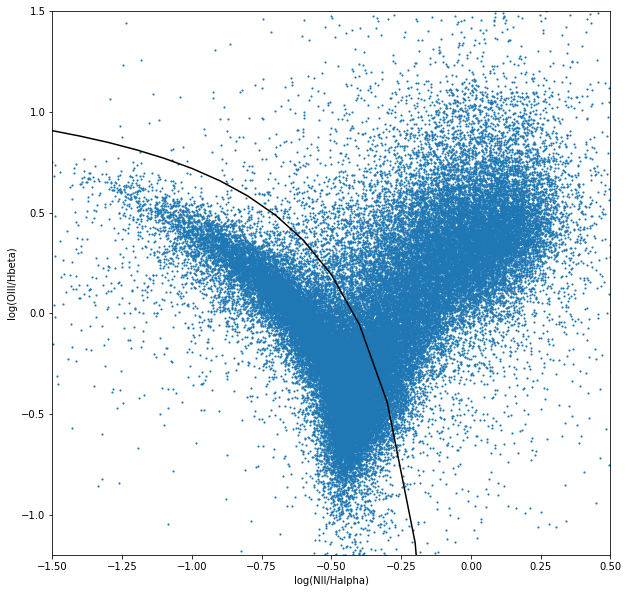

In [26]:
fig2 = plt.figure(figsize=(10,10))

O3HB = []
N2HA = []
for i in np.arange(len(LO3_arr)):
    if LO3_arr[i] > 0 and LHB_arr[i] > 0 and LN2_arr[i] > 0 and LHA_arr[i] > 0:
        O3HB.append(math.log(LO3_arr[i]/LHB_arr[i], 10))
        N2HA.append(math.log(LN2_arr[i]/LHA_arr[i], 10))

#create Kauffman line:
KN2 = np.arange(-1.5,0,0.1)
KO3 = 0.61/(KN2-0.05) + 1.3
plt.plot(KN2, KO3, color='k')
plt.scatter(N2HA, O3HB, marker = '.', s=5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.5)
#plt.xlim(-3,1)
#plt.ylim(-3,2)
plt.xlabel('log(NII/Halpha)')
plt.ylabel('log(OIII/Hbeta)')
plt.show()
plt.savefig('../BPT.jpg')

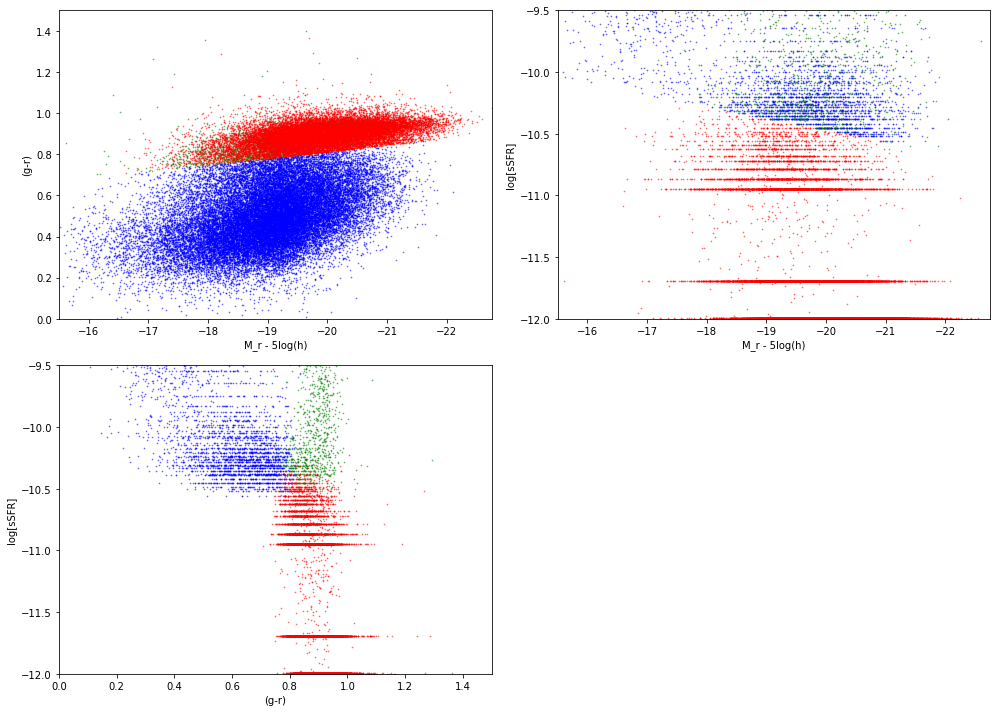

In [40]:
fig = plt.figure(figsize=(14,10))

colors = [late_color, int_color, early_color]
mrs = [late_mr, int_mr, early_mr]
sfrs = [late_sfr, int_sfr, early_sfr]
plot_color = ['b', 'g', 'r']

#top left plot
ax1 = fig.add_subplot(221)
for i in np.arange(3):
    ax1.scatter(mrs[i], colors[i], color = plot_color[i], s=0.5, alpha=0.5)
ax1.set_ylabel('(g-r)')
ax1.set_xlabel('M_r - 5log(h)')
ax1.set_ylim(0, 1.5)
ax1.set_xlim(-15.5, -22.75)

#top right plot
ax2 = fig.add_subplot(222)
for i in np.arange(3):
    ax2.scatter(mrs[i], sfrs[i], color = plot_color[i], s=0.5, alpha=0.5)
ax2.set_ylabel('log[sSFR]')
ax2.set_xlabel('M_r - 5log(h)')
ax2.set_ylim(-12, -9.5)
ax2.set_xlim(-15.5, -22.75)

#bottom left plot
ax3 = fig.add_subplot(223)
for i in np.arange(3):
    ax3.scatter(colors[i], sfrs[i], color = plot_color[i], s=0.5, alpha=0.5)
ax3.set_ylabel('log[sSFR]')
ax3.set_xlabel('(g-r)')
ax3.set_ylim(-12, -9.5)
ax3.set_xlim(0,1.5)

plt.tight_layout()
plt.show()

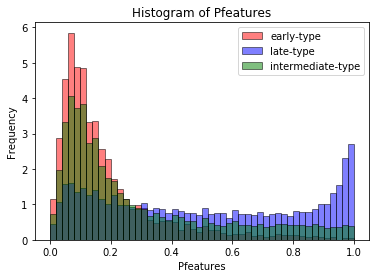

In [5]:
plt.hist(early_pfeatures, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_pfeatures, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_pfeatures, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('Pfeatures')
plt.ylabel('Frequency')
plt.title('Histogram of Pfeatures')
plt.legend(loc='upper right')
plt.show()

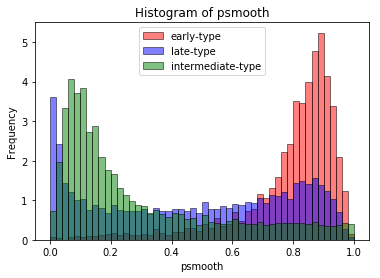

In [6]:
plt.hist(early_psmooth, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_psmooth, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_psmooth, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('psmooth')
plt.ylabel('Frequency')
plt.title('Histogram of psmooth')
plt.legend(loc='upper center')
plt.show()